# Stock Price Prediction Using LSTM

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

In [3]:
stock_symbol = "AAPL"

In [7]:
data = yf.download(tickers = stock_symbol,start="2021-01-01",end = "2022-10-10",interval = "1h")

[*********************100%***********************]  1 of 1 completed


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
2021-01-04 09:30:00-05:00,133.570007,133.611603,130.380005,131.053604,131.053604,27653145
2021-01-04 10:30:00-05:00,131.054993,131.309998,129.399994,129.895004,129.895004,20134055
2021-01-04 11:30:00-05:00,129.889893,130.089996,126.760002,128.250000,128.250000,23694210
2021-01-04 12:30:00-05:00,128.246902,129.110001,127.630096,129.039795,129.039795,14745063
2021-01-04 13:30:00-05:00,129.039993,129.199997,128.595001,128.960007,128.960007,10861778
...,...,...,...,...,...,...
2022-10-07 11:30:00-04:00,141.240005,141.479996,140.639008,140.675003,140.675003,7405620
2022-10-07 12:30:00-04:00,140.669998,140.720001,139.940002,140.279999,140.279999,7685803
2022-10-07 13:30:00-04:00,140.145004,140.600006,140.035004,140.077896,140.077896,6175166
2022-10-07 14:30:00-04:00,140.070007,140.535004,139.600006,139.721893,139.721893,8536199


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3112 entries, 2021-01-04 09:30:00-05:00 to 2022-10-07 15:30:00-04:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3112 non-null   float64
 1   High       3112 non-null   float64
 2   Low        3112 non-null   float64
 3   Close      3112 non-null   float64
 4   Adj Close  3112 non-null   float64
 5   Volume     3112 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 170.2 KB


<AxesSubplot:>

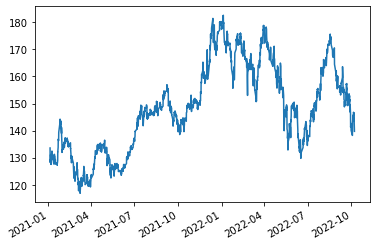

In [14]:
data["Open"].plot()

In [15]:
import matplotlib.pyplot as plt

In [17]:
ds = data["Open"].values

In [18]:
ds

array([133.57000732, 131.05499268, 129.88989258, ..., 140.14500427,
       140.07000732, 139.72000122])

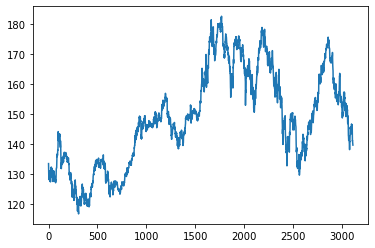

In [19]:
plt.plot(ds)